# KMeans

## Лабораторная работа №3

Присвойте строку с вашим ФИО переменной `name` и выполните ячейку. В ее выводе будет указан номер вашего варианта.

In [1]:
name = "Шурова Дарья Сергеевна" # Впишите ваше ФИО

def calculate_variant(name):
    return sum(ord(char) for char in name) % 2 + 1

print(f"Ваш вариант - №{calculate_variant(name)}")


Ваш вариант - №1



---

**Впишите в эту ячейку ваши ФИО, группу и вариант**.

ФИО: Шурова Дарья Сергеевна

Группа: 221-328

Вариант: 1

---

Далее по ходу ноутбука вам встрется ячейки с кодом, в которых будут комментарии с заданиями, и текстовые ячейки как эта с вопросами, на которые вам необходимо письменно в ноутбуке ответить.

Все ячейки необходимо запускать.

Данные для вариантов лежат по ссылкам:

1. http://labcolor.space/kmeans-1.csv
1. http://labcolor.space/kmeans-2.csv

Скопируйте ссылку для своего варианта.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 12, 5

## Чтение данных

Используя уже знакомый метод из библиотеки Pandas, считайте данные в формате csv по ссылке из вашего варианта в датафрейм.

Изучите ваш датасет: сколько в нем объектов, сколько признаков, в каких диапазонах изменяются признаки, есть ли в данных целевой признак.

In [3]:
df = pd.read_csv('http://labcolor.space/kmeans-1.csv')

#
# Ваш код
#

In [4]:
df.head()

,370.0,372.4161073825503,374.8322147651007,377.248322147651,379.66442953020135,382.08053691275165,384.496644295302,386.9127516778523,389.3288590604027,391.744966442953,...,708.255033557047,710.6711409395973,713.0872483221476,715.5033557046979,717.9194630872483,720.3355704697987,722.7516778523491,725.1677852348994,727.5838926174497,730.0
0,0.225492,0.203538,0.180878,0.157003,0.132323,0.106525,0.079894,0.053938,0.039348,0.042177,...,1.585755,1.585948,1.586566,1.588979,1.590289,1.591105,1.591962,1.591732,1.591135,1.589409
1,0.163547,0.153248,0.143601,0.130526,0.116132,0.100322,0.082402,0.064280,0.056223,0.065360,...,1.619337,1.616038,1.616183,1.619835,1.624449,1.630787,1.638181,1.645925,1.654092,1.662842
2,0.195950,0.181431,0.166413,0.149892,0.132985,0.116132,0.097992,0.080928,0.074836,0.085611,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012042,0.039149,...,1.944570,1.944832,1.946384,1.948150,1.950105,1.953185,1.956505,1.960230,1.963540,1.966306
4,0.199077,0.184688,0.170259,0.154662,0.138165,0.120123,0.100716,0.081677,0.073358,0.082065,...,1.867641,1.859791,1.851601,1.843168,1.834290,1.825888,1.817867,1.809623,1.801843,1.794387


In [5]:
df.shape

(70, 150)

In [6]:
df.describe()


,370.0,372.4161073825503,374.8322147651007,377.248322147651,379.66442953020135,382.08053691275165,384.496644295302,386.9127516778523,389.3288590604027,391.744966442953,...,708.255033557047,710.6711409395973,713.0872483221476,715.5033557046979,717.9194630872483,720.3355704697987,722.7516778523491,725.1677852348994,727.5838926174497,730.0
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,...,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,0.823107,0.817470,0.811879,0.805177,0.797790,0.787118,0.772744,0.758448,0.747047,0.746668,...,0.849851,0.846068,0.843866,0.847447,0.850102,0.852765,0.855025,0.856827,0.858439,0.859531
std,0.697039,0.708436,0.720629,0.733947,0.748086,0.760406,0.770866,0.781845,0.784171,0.780502,...,0.768531,0.766166,0.763371,0.756910,0.751268,0.746156,0.741764,0.737769,0.734330,0.731344
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.268640,0.257197,0.247157,0.231790,0.217042,0.199209,0.177311,0.153054,0.139394,0.140536,...,0.186620,0.181640,0.181786,0.189525,0.193876,0.197779,0.200795,0.210556,0.218894,0.227714
50%,0.387143,0.367826,0.346762,0.324548,0.307158,0.287907,0.267811,0.241708,0.223817,0.215590,...,0.307201,0.313790,0.321658,0.337729,0.350445,0.362761,0.368403,0.370229,0.377620,0.386516
75%,1.648386,1.662674,1.678615,1.691970,1.704809,1.712099,1.705360,1.701941,1.691691,1.685457,...,1.719335,1.707420,1.701500,1.693976,1.686068,1.678181,1.667980,1.664090,1.656509,1.653735
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


**Опишите ваши данные.**

Сколько в нем объектов: 70

Сколько признаков: 150

В каких диапазонах изменяются признаки: от 0 до 2

Есть ли в данных целевой признак: нет

## Кластеризация

Когда решалась задача классификации с помощью алгоритма knn в наших данных был целевой признак, по которому можно было определить количество классов. При решении задачи кластеризации мы заранее не имеем информации, по которой мы можем задать количество кластеров, поэтому пока при создании экземпляра объекта выберите количество кластеров до 20. Не забудьте задать `random_state`.

In [8]:
# Импортируйте класс из соответствующего модуля библиотеки sklearn
from sklearn.cluster import KMeans

kmeans = KMeans(init='k-means++',
                n_init=10,
                n_clusters=6,
                max_iter=300,
                random_state=42,)  # Ваш код
kmeans.fit(df)  # Ваш код

KMeans(n_clusters=6, n_init=10, random_state=42)

Опишите своими словами за что отвечают параметры:

n_clusters - кол-во ксатеров

init - K-means++ — это алгоритм кластеризации, который используется для разделения данных на группы (кластеры).

n_init - то атрибут в библиотеке машинного обучения scikit-learn, который используется для определения количества итераций в алгоритме кластеризации k-means.

max_iter - это параметр в алгоритмах оптимизации в Python, который определяет максимальное количество итераций.

random_state - это параметр, который используется для управления генерацией случайных чисел в алгоритмах машинного обучения.

После выполнения метода `.fit()` у экземпляра оценщика (estimator) доступны атрибуты `labels_` и `inertia_`.

`labels_` - массив с указаниями индексов кластеров для всех ваших объектов.

Используя `labels_`, посчитайте сколько объектов относится к каждому кластеру.

**Сколько объектов относится к каждому кластеру?**

**Ваш ответ:**
0 кластер - 5 об.
1 кластер - 9 об.
2 кластер - 16 об.
3 кластер - 10 об.
4 кластер - 16 об.
5 кластер - 14 об.

In [9]:
kmeans.labels_

array([5, 5, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 5, 0, 5, 5, 5, 4, 4, 4,
       1, 4, 1, 1, 4, 4, 4, 4, 1, 1, 4, 1, 1, 4, 1, 4, 4, 4, 4, 1, 4, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3], dtype=int32)

`inertia_` для KMeans это SSD (Sum of squared distances - сумма квадратов расстояний) или по-другому это еще называют SSE (Sum of Squares Error - сумма квадратов ошибки.)

Если SSD это сумма квадратов расстояний, то между чем и чем рассчитываются расстояния?

**Ваш ответ**: В этом случае расстояния рассчитываются между точками данных и центрами кластеров.

In [10]:
# Выведите значение суммы квадратов расстоянияний для вашей модели

inertia_value = kmeans.inertia_

print("Сумма квадратов расстояний (inertia):", inertia_value)

Сумма квадратов расстояний (inertia): 76.14715853965467


## Подбор количества кластеров

Для подбора оптимального количества кластеров мы воспользуемся графическим методом - "методом локтя" (Elbow Method). Для этого мы создаем множество моделей с разным количеством кластеров, "подгоняем" (fit) их и оцениваем SSD.

Гипотеза, которая позволяет использовать данный метод, заключается в том, что центройд является прототипом кластера, а следовательно объекты должны кучнее располагаться к нему, поэтому сумма квадратов расстояний должна быть меньше.

**А в каком случае для k средних (KMeans) оцениваемые расстояния равны 0?**

**Ваш ответ:** если данные точки совпадают с центром кластера

Теперь ваша задача в цикле создать n моделей и записать их критерий (сумму квадратов расстояний) в словарь (dict).

In [11]:
SSE = {}

kmeans_kwargs = {
    'init': 'k-means++',
    'n_init': 10,
    'max_iter': 300,
    'random_state': 42,
}

for k in np.arange(2, 19):  # # Ваш код: в arange укажите в качестве начального значения 2, а конечного число до 20.
  cluster = KMeans(n_clusters=k, **kmeans_kwargs)  # Ваш код
  cluster.fit(df)  # Ваш код
  SSE[k] = cluster.inertia_

Построим график для оценки, где по оси абсцисс указано количество кластеров, а по оси ординат указано значение, которое описывает сумму квадратов расстояний.

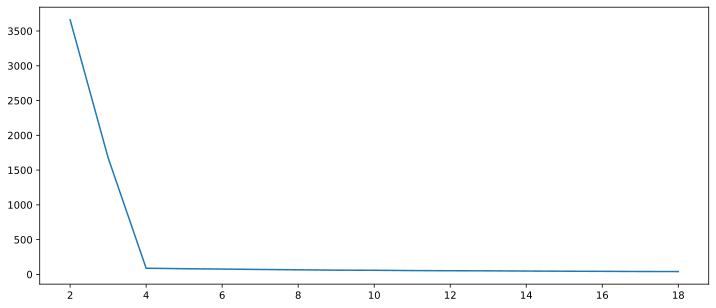

In [12]:
lists = SSE.items()
x, y = zip(*lists)

plt.plot(x, y)
plt.show()

Теперь по графику найдите число кластеров, начиная с которого критерий SSD снижается не так быстро.

Получившееся число кластеров - **4**.

## Итоговая модель

In [13]:
# Создайте финальный вариант модели с подобраным количеством кластеров и обучите ее.

kmeans_kwargs = {
    'init': 'k-means++',
    'n_init': 10,
    'n_clusters': 4,
    'max_iter': 300,
    'random_state': 42,
}

final_model = KMeans(**kmeans_kwargs)
final_model.fit(df)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [14]:
kmeans.labels_

array([5, 5, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 5, 0, 5, 5, 5, 4, 4, 4,
       1, 4, 1, 1, 4, 4, 4, 4, 1, 1, 4, 1, 1, 4, 1, 4, 4, 4, 4, 1, 4, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3], dtype=int32)

Используя `labels_`, посчитайте сколько объектов относится к каждому кластеру.

**Сколько объектов относится к каждому кластеру?**

**Ваш ответ:**
0 - 5;
1 - 9;
2 - 16;
3 - 10;
4 - 16;
5 - 14;

**Кратко опишите суть алгоритма KMeans.**

**Ваш ответ:**

K-Means — это алгоритм кластеризации, который разделяет данные на группы (кластеры) на основе их сходства.

Алгоритм работает следующим образом:

1. Задаётся количество кластеров K.
2. Выбираются K случайных точек, которые становятся центрами кластеров.
3. Каждый объект данных относится к ближайшему центру кластера.
4. Центры кластеров пересчитываются как среднее значение объектов в каждом кластере.
5. Шаги 3 и 4 повторяются, пока центры кластеров не перестанут изменяться.